# Marketing Data Analysis
    a.	Preprocess and clean if necessary.
    b.	Build a model predicting “churn”. 
    c.	Remember to comment your code and give rationales for models, algorithms, and approaches. 


## Import Packages

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load data

In [2]:
import pyodbc
import urllib
import sqlalchemy

'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))

In [55]:
df=pd.read_sql_table(r"marketing_churn",engine_datahub)
# df=pd.read_excel("C:\Business_Data_Analysis\data\marketing_churn.xlsx")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,7,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,0
1,21,15577657,McDonald,732,France,Male,41,8,0.0,2,1,1,170886.17,0
2,77,15614049,Hu,664,France,Male,55,8,0.0,2,1,1,139161.64,0
3,94,15640635,Capon,769,France,Male,29,8,0.0,2,1,1,172290.61,0
4,142,15724944,Tien,663,France,Male,34,7,0.0,2,1,1,180427.24,0


## Exploratory Data Analysis(EDA)



### Check missing values and shape
Normally we need to clean the samples, i,e, impute missing values but in this case the data is pretty clean with no missing values. We also check the shape to make sure it matches the meta data info in the document. 

In [50]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(None, (10000, 14))

### Check Churn ratio
The samples are balanced so we can use "Accuracy" metric to measure the performance of the model

<AxesSubplot:>

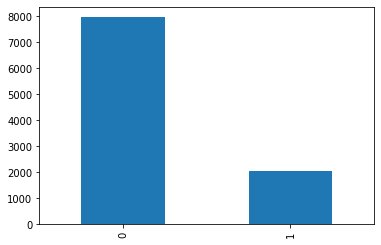

In [56]:
target='Exited'
df[target].value_counts().plot(kind='bar')

### Describe the data

Categorical features/Dimensions 

In [76]:
droplist='Surname'
cat_cols=df.select_dtypes(object).drop(droplist,axis=1).columns.tolist()
cat_cols

['Geography', 'Gender']

In [75]:
df.select_dtypes(object).drop(droplist,axis=1).columns.tolist()

list

In [67]:
help(df.select_dtypes)

Help on method select_dtypes in module pandas.core.frame:

select_dtypes(include=None, exclude=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Return a subset of the DataFrame's columns based on the column dtypes.
    
    Parameters
    ----------
    include, exclude : scalar or list-like
        A selection of dtypes or strings to be included/excluded. At least
        one of these parameters must be supplied.
    
    Returns
    -------
    DataFrame
        The subset of the frame including the dtypes in ``include`` and
        excluding the dtypes in ``exclude``.
    
    Raises
    ------
    ValueError
        * If both of ``include`` and ``exclude`` are empty
        * If ``include`` and ``exclude`` have overlapping elements
        * If any kind of string dtype is passed in.
    
    See Also
    --------
    DataFrame.dtypes: Return Series with the data type of each column.
    
    Notes
    -----
    * To select all *numeric* types, use ``np.number

In [77]:
len(categorical_features)


2

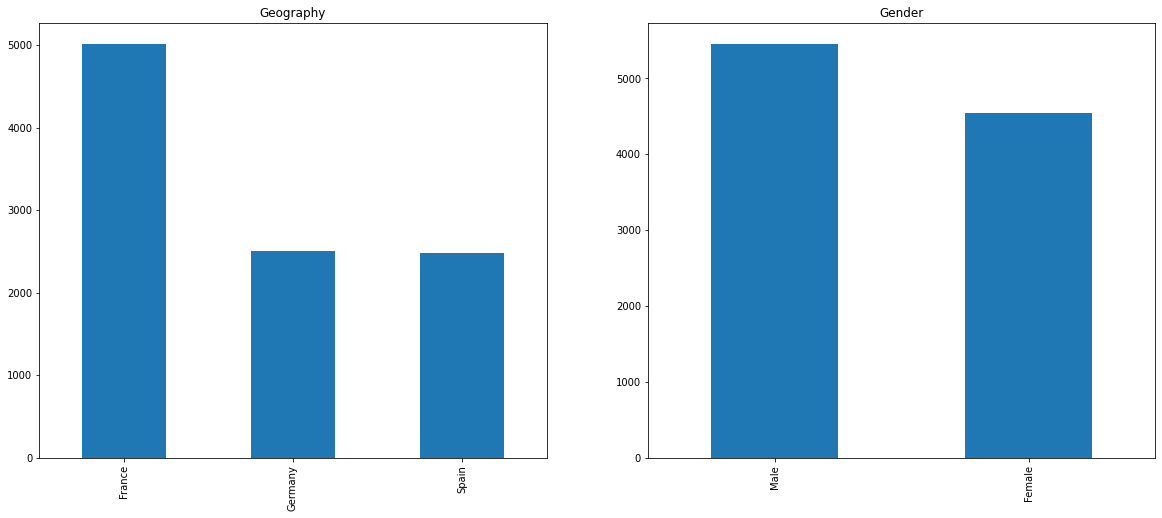

In [81]:
import matplotlib.pyplot as plt
categorical_features = cat_cols
# fig, ax = plt.subplots(1, len(categorical_features))
fig, ax = plt.subplots(1, len(categorical_features))

for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i],figsize=(20,8),rot=90,fontsize=10).set_title(categorical_feature)


Numeric data

#### Histogram
Histogram groups numeric data into bins, displaying the bins as segmented columns and summarize the distribution of a univariate data set. 

In [82]:
droplist=['RowNumber','CustomerId']
num_cols=df.select_dtypes('number').drop(droplist,axis=1).columns.tolist()
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [11]:

help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)
    DEPRECATED: Flexibly plot a univariate distribution of observations.
    
    .. warning::
       This function is deprecated and will be removed in a future version.
       Please adapt your code to use one of two new functions:
    
       - :func:`displot`, a figure-level function with a similar flexibility
         over the kind of plot to draw
       - :func:`histplot`, an axes-level function for plotting histograms,
         including with kernel density smoothing
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and

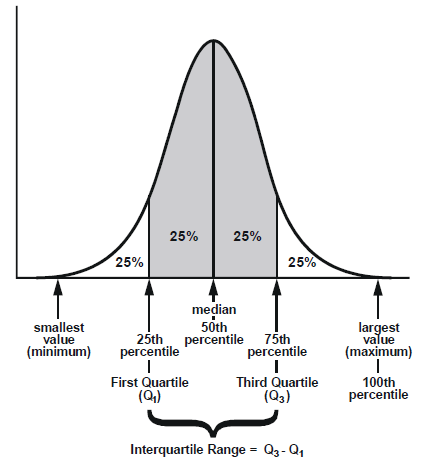

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

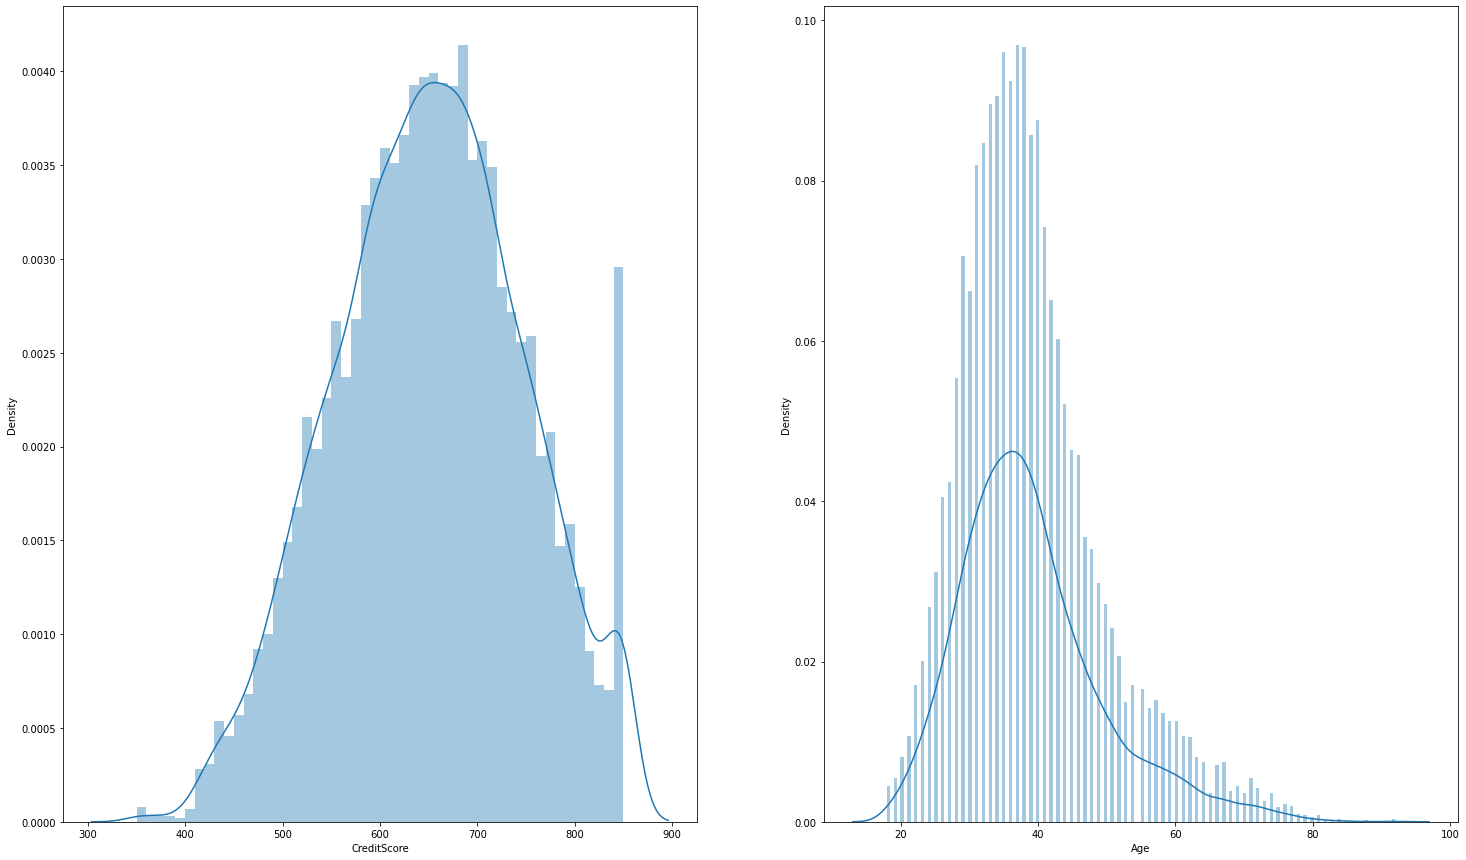

In [85]:
fig, ax = plt.subplots(1,2, figsize=(25,15))

sns.distplot(df['CreditScore'], ax=ax[0],bins=50)
sns.distplot(df['Age'],ax=ax[1], bins=150)

In [38]:
i=0
j=1
df[df[num_cols].columns[i+j]]
ax[i][j]
# placeholder

TypeError: 'AxesSubplot' object is not subscriptable

In [91]:
df[df[num_cols].columns[0+1]]

0       50
1       41
2       55
3       29
4       34
        ..
9995    38
9996    33
9997    58
9998    48
9999    35
Name: Age, Length: 10000, dtype: int64

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

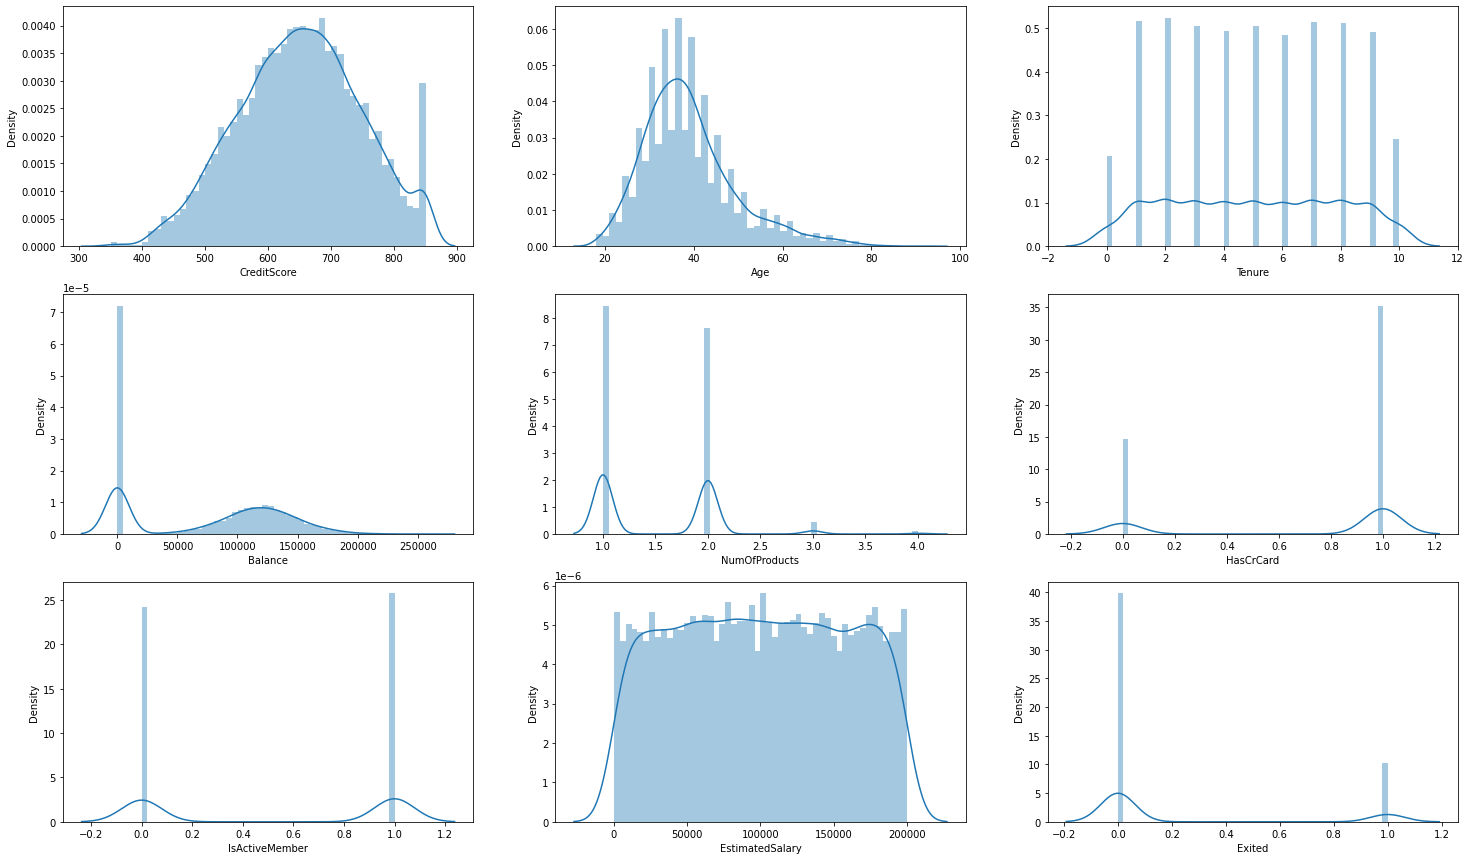

In [92]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(3,3, figsize=(25,15))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
            sns.distplot(df[df[num_cols].columns[i*3+j]], ax=ax[i][j],bins=50)
        
        
# for i in range(9):
#     print(i)
#     sns.distplot(df[df[num_cols].columns[i]], ax=ax[i],bins=50)        

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packa

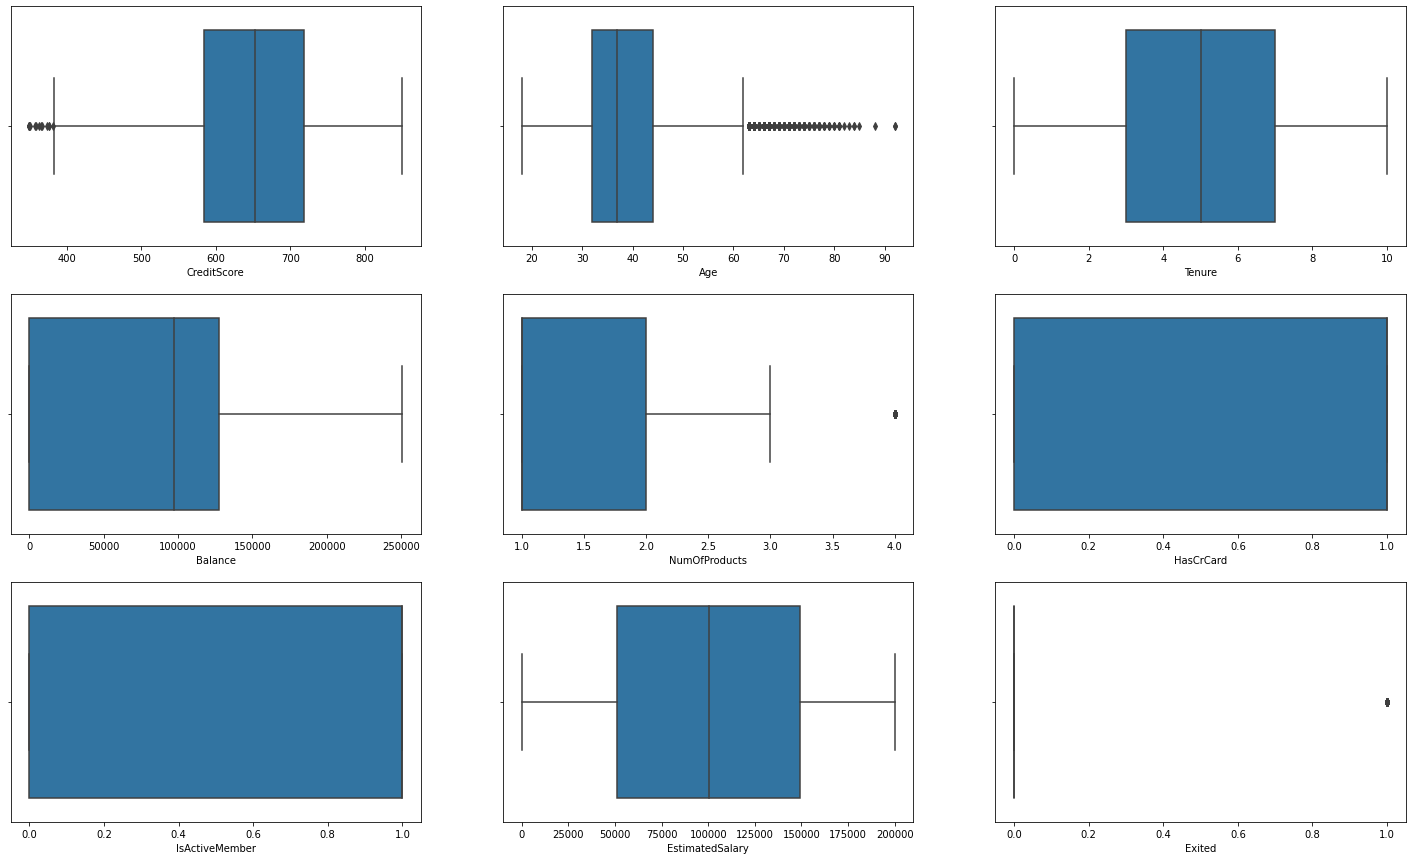

In [93]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(3, 3, figsize=(25, 15))

#plot the features except LOCATION_ID and Risk
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
#         sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v',showfliers=False)
        sns.boxplot(df[df[num_cols].columns[i*3+j]], ax=ax[i][j],orient='v')

In [95]:
df.describe()
# from the "max" row we can see feature PARA_A, PARA_B,Money_Value,History have some potential outliers. 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Clip, i.e. assigns values outside boundary to boundary values, the data to deal with outliers. 
 Outliers may distort how we see the data. They contain information too so it's a tradeoff; we lose some info but gain a better big picture of the data.

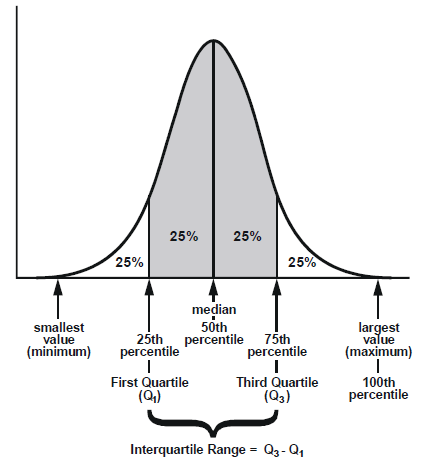

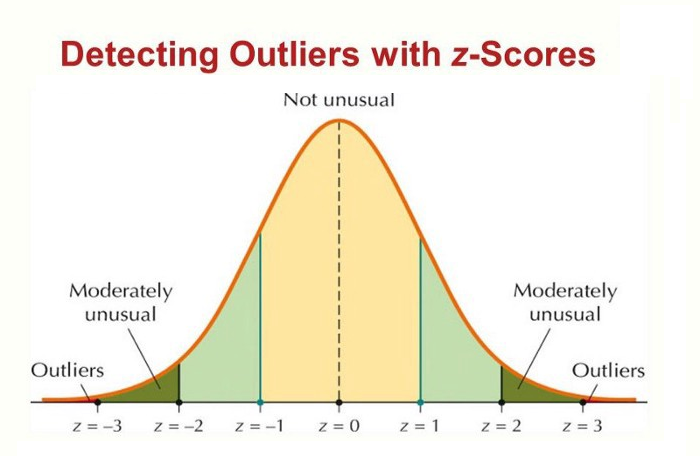

In [96]:
df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,822,50,7,0.00,2,1,1,10062.80,0
1,732,41,8,0.00,2,1,1,170886.17,0
2,664,55,8,0.00,2,1,1,139161.64,0
3,769,29,8,0.00,2,1,1,172290.61,0
4,663,34,7,0.00,2,1,1,180427.24,0
...,...,...,...,...,...,...,...,...,...
9995,750,38,5,151532.40,1,1,1,46555.15,0
9996,670,33,8,126679.69,1,1,1,39451.09,0
9997,739,58,2,101579.28,1,1,1,72168.53,0
9998,623,48,5,118469.38,1,1,1,158590.25,0


In [97]:
# here we use quantile 0.01 as lower limit and 0.99 upper.
df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.743200,38.89760,5.012800,76369.720704,1.524200,0.70550,0.515100,100089.576990,0.203700
std,2886.89568,7.193619e+04,96.115361,10.31522,2.892174,62172.016053,0.560933,0.45584,0.499797,57477.436802,0.402769
min,1.00000,1.556570e+07,432.000000,21.00000,0.000000,0.000000,1.000000,0.00000,0.000000,1842.825300,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.00000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.00000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.00000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,72.00000,10.000000,185967.985400,3.000000,1.00000,1.000000,198069.734500,1.000000


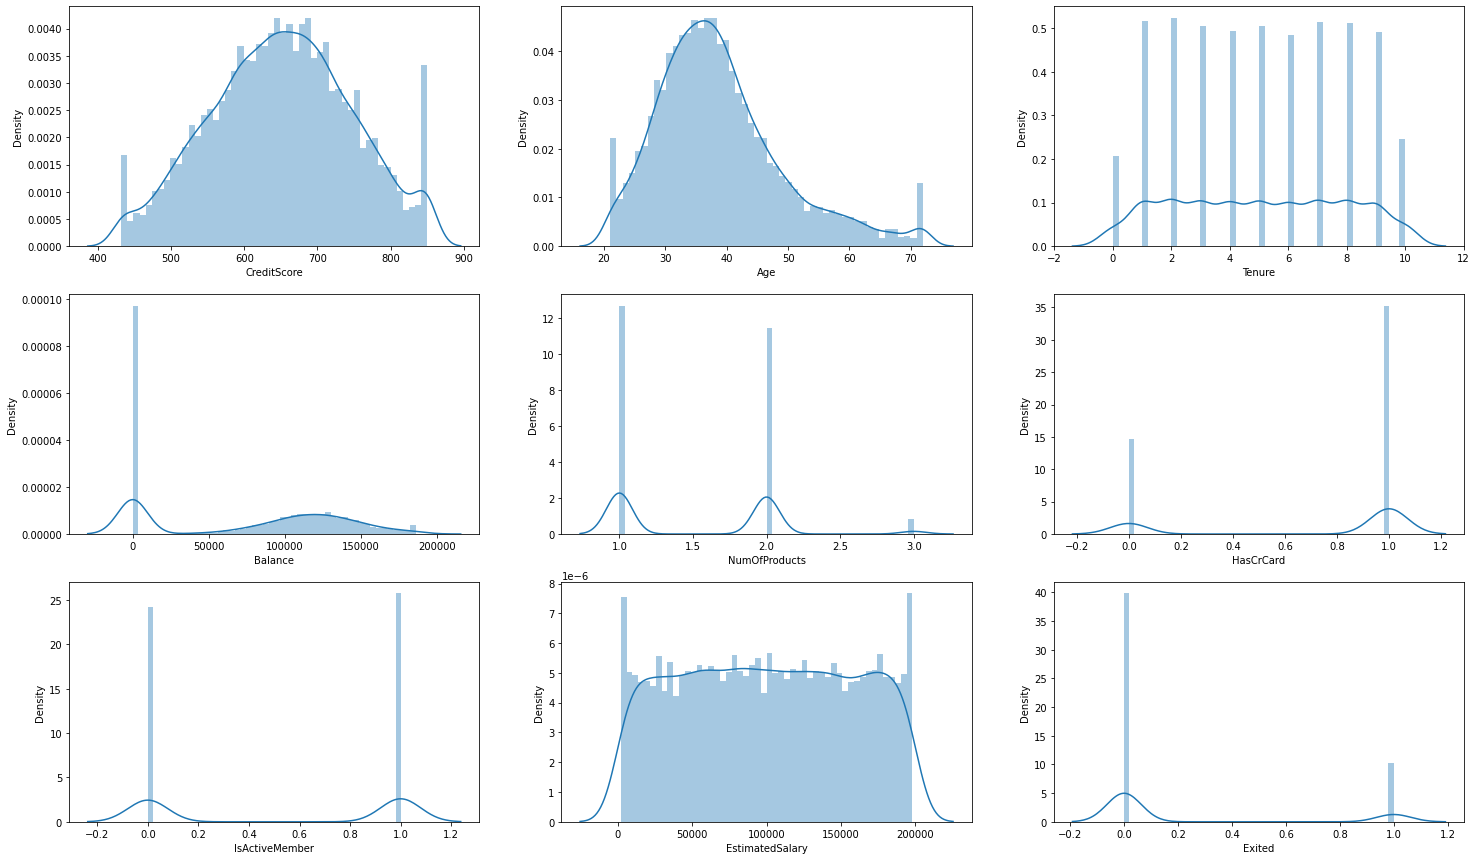

In [98]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(3, 3, figsize=(25, 15))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df[df[num_cols].columns[i*3+j]], ax=ax[i][j],bins=50)

### Boxplot the data
Boxplot shows the shape of the distribution, its central value, and its variability

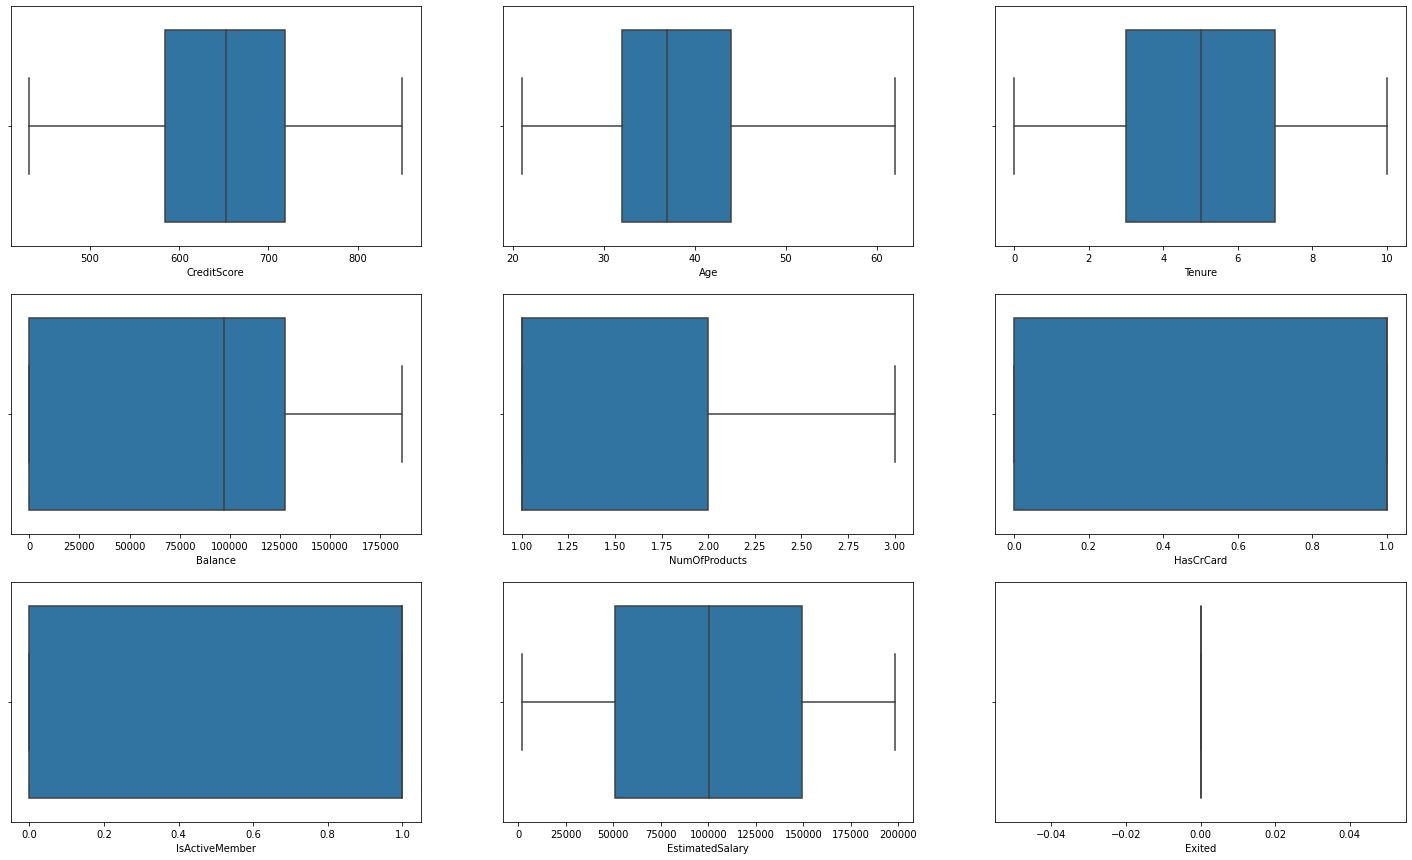

In [99]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(3, 3, figsize=(25, 15))

#plot the features except LOCATION_ID and Risk
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(df[df[num_cols].columns[i*3+j]], ax=ax[i][j],orient='v',showfliers=False)

#### Explain the Boxplots:
The boxplots tell similar story as the Histograms. None of the distributions seem normal.

### Correlation heatmap
Correlation heatmap allows us to see relations between features/attributes. The higher the absolute coefficient, the stronger the correlation is. 

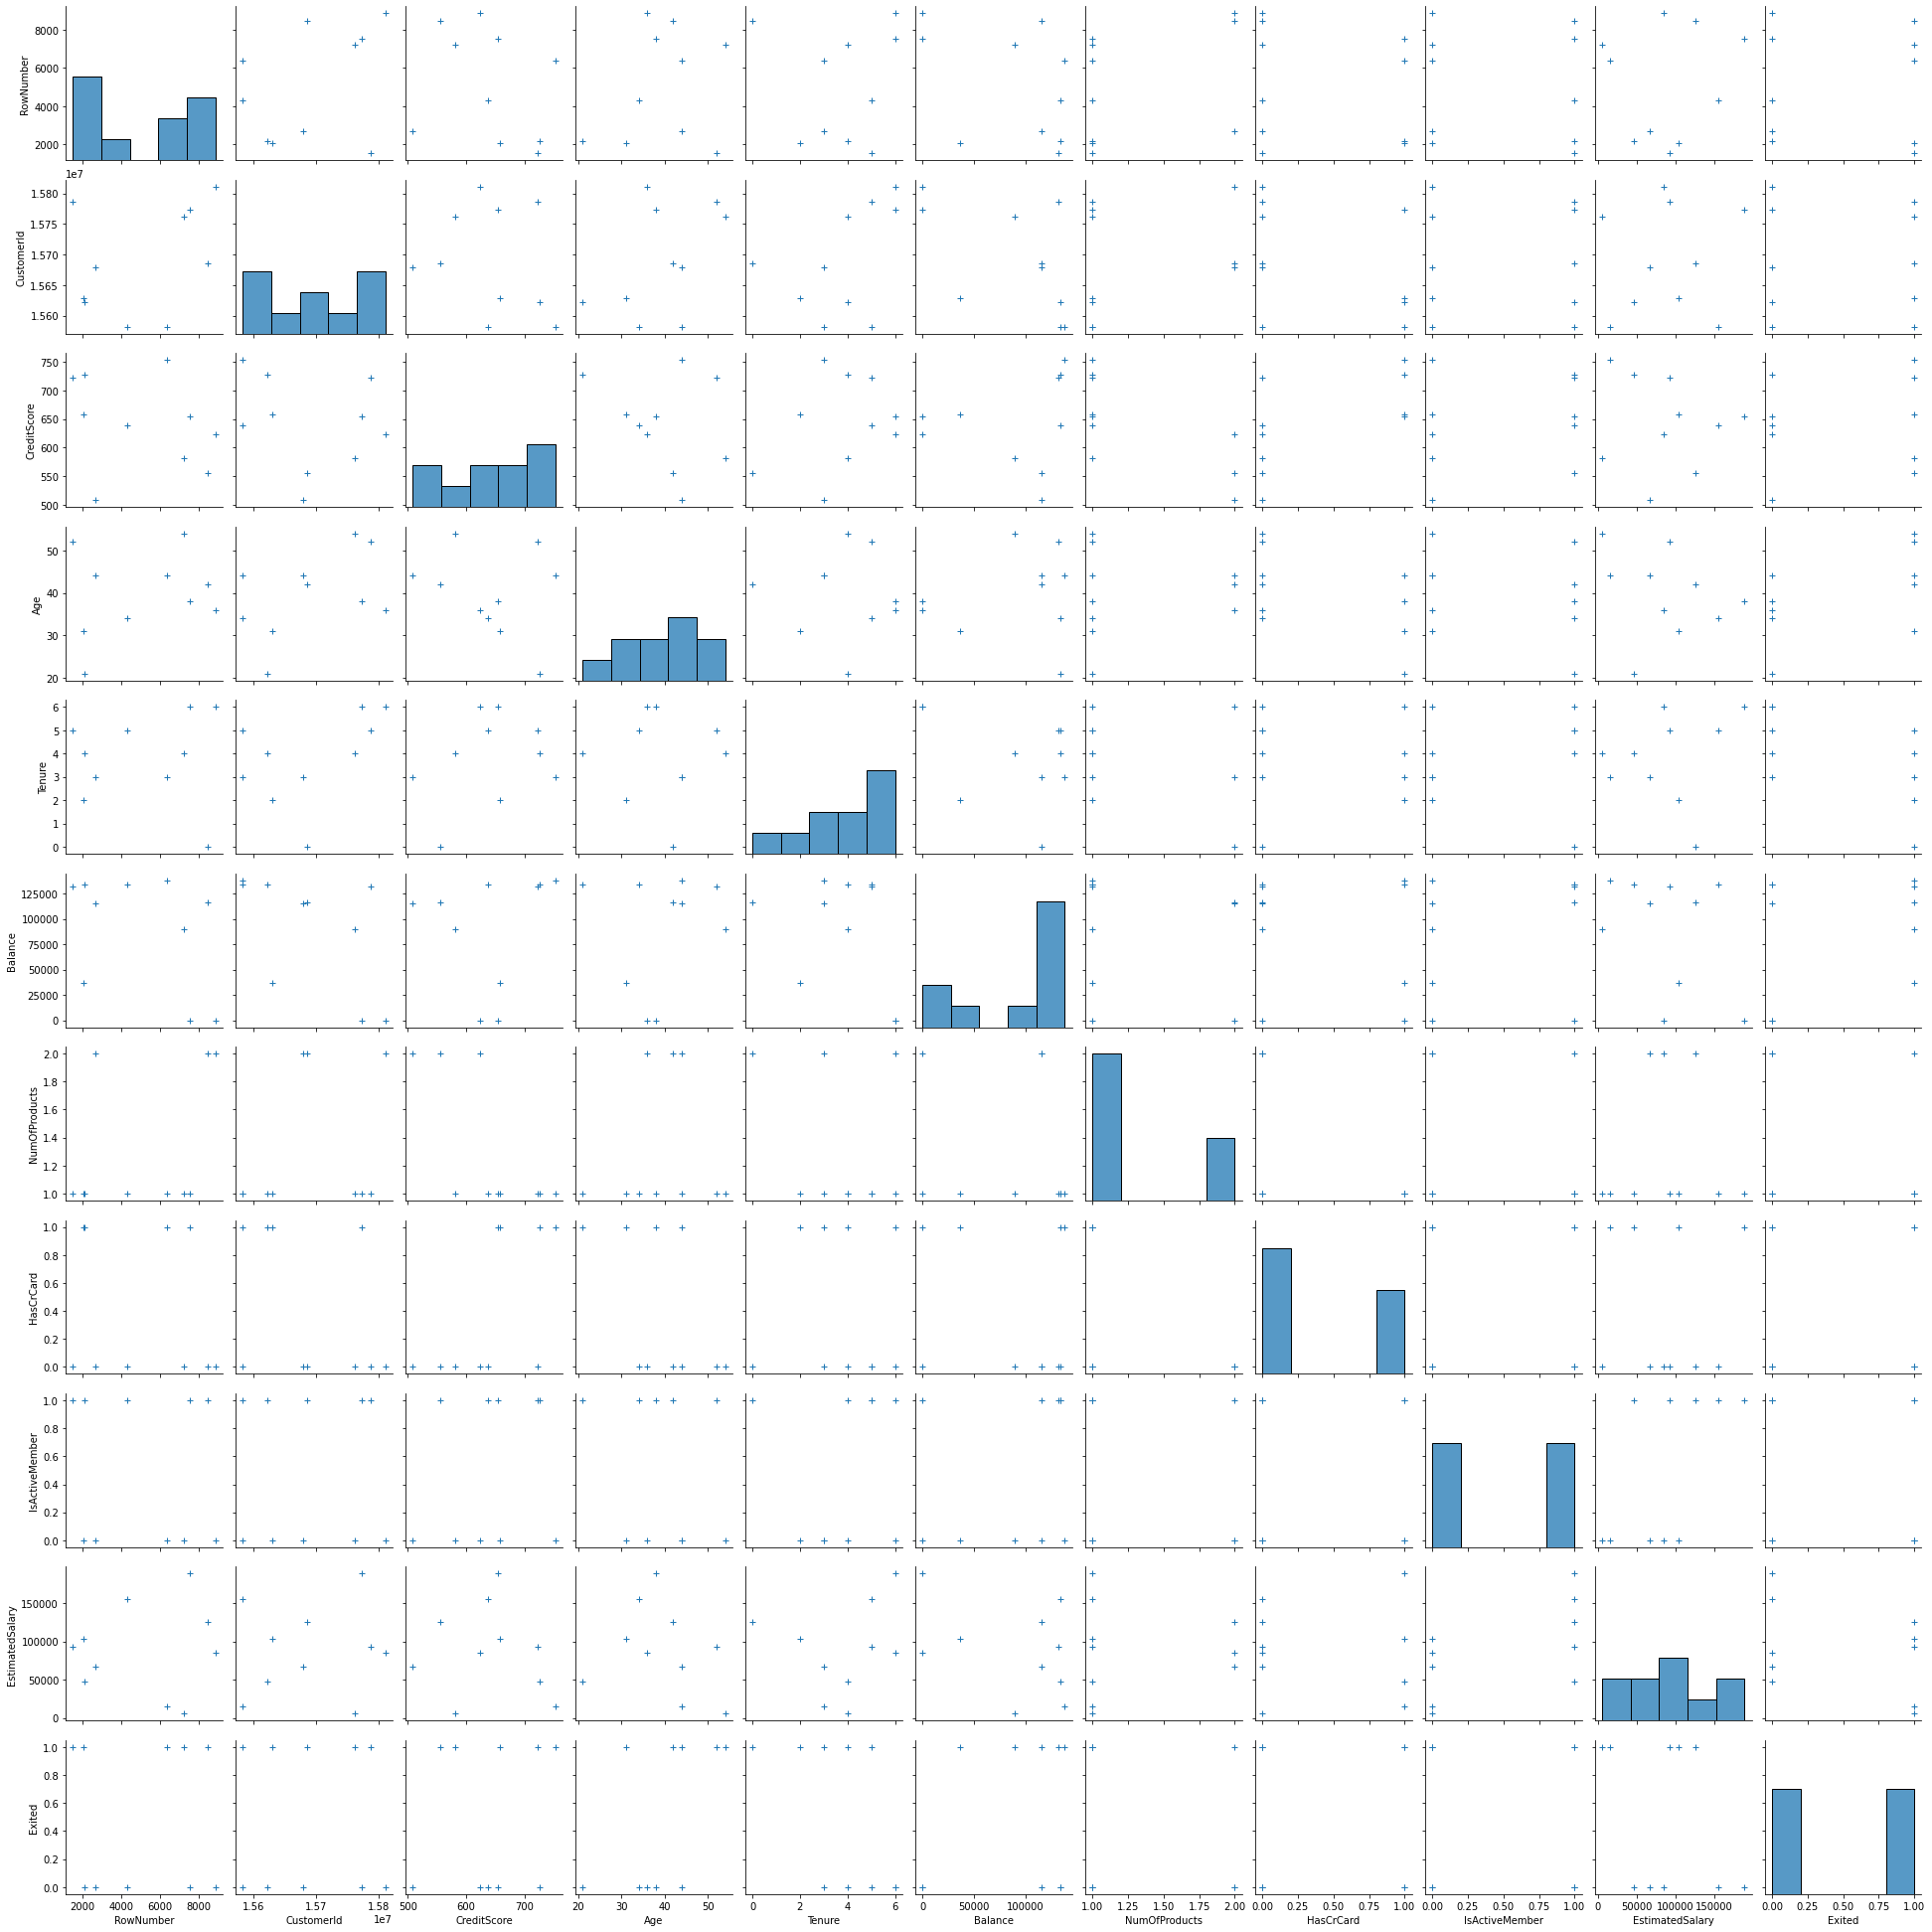

In [18]:
import seaborn as sns
# df=df.query('`Loan ID`.notnull()', engine='python')
sns.pairplot(df.sample(frac=0.001, replace=True).reset_index(drop=True),plot_kws=dict(marker="+", linewidth=1))

In [19]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

<AxesSubplot:>

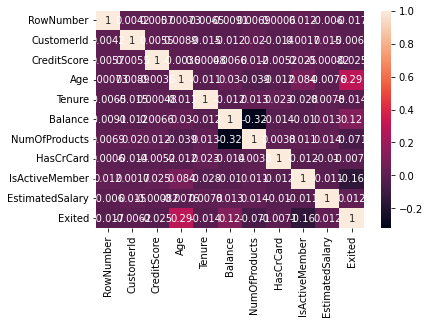

In [103]:
sns.heatmap(df.corr(), annot=True)

# Numerical vs Numerical

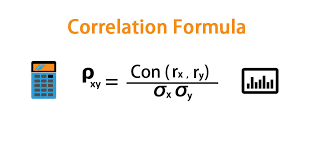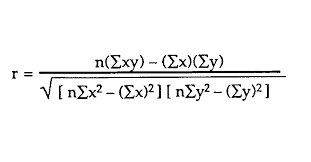

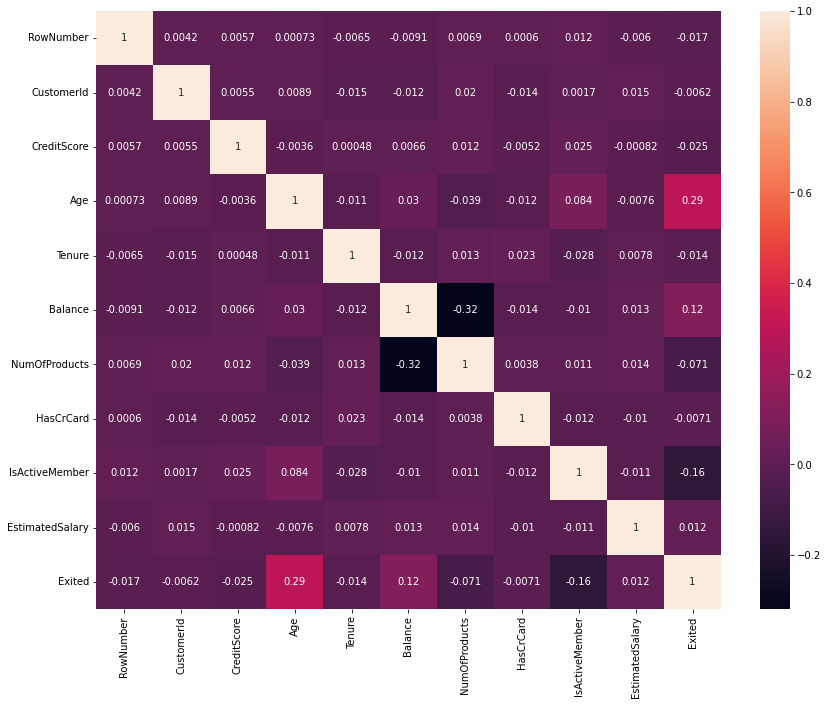

In [104]:

# df['Loan Status encoded']=np.where(df['Loan Status']=='Fully Paid',0,1)
# corrMatrix = df.corr()
# plt.figure(figsize = (12,9))
# ax=(sns.heatmap(corrMatrix, annot=True))
# plt.show()

fig, ax = plt.subplots(figsize=(14,11))

ax=(sns.heatmap(df.corr(), annot=True))

In [106]:
chi2_contingency(pd.crosstab(v1, v2))

(112.91857062096116,
 2.2482100097131755e-26,
 1,
 array([[3617.5909, 4345.4091],
        [ 925.4091, 1111.5909]]))

chisquare test
https://www.youtube.com/watch?v=misMgRRV3jQ&ab_channel=MathMeeting

Chi Square p value = 2.2482100097131755e-26


Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


Gender,Female,Male
Exited,,
0,0.427477,0.572523
1,0.559156,0.440844


<AxesSubplot:xlabel='Gender', ylabel='Exited'>

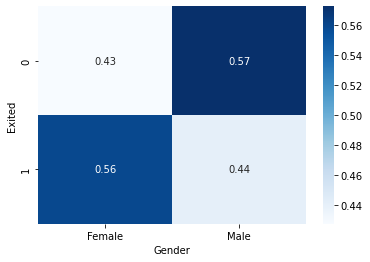

In [105]:
from scipy.stats import chisquare,chi2_contingency

v1=df['Exited']

# v2=df['Geography']
v2=df['Gender']
# g, p, dof, expctd=chi2_contingency(pd.crosstab(v1, v2))
print('Chi Square p value =' , chi2_contingency(pd.crosstab(v1, v2))[1])

display(pd.crosstab(v1, v2))
display(pd.crosstab(v1, v2,normalize='index'))
# sns.heatmap(pd.crosstab(v1, v2), annot=True)
sns.heatmap(pd.crosstab(v1, v2,normalize='index'), annot=True,cmap="Blues")


# Categorical vs Categorical

<AxesSubplot:>

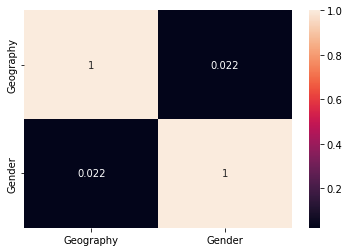

In [107]:
#import stats package
import scipy.stats as ss

#define the Cramér’s V function to get the association
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# create the dataset with association coefficeints for heatmap
g=pd.DataFrame()
cols=cat_cols
for c1 in cols:
    l=[]
    f=[]
    d=pd.DataFrame()
    
    for c2 in cols:
        l.append(cramers_v(df[c1],df[c2]))
        f.append(c2) 
        d=pd.concat([d,pd.DataFrame(l,columns=[c1],index=f)]).drop_duplicates()
    g=pd.concat([g,d],axis=1)

sns.heatmap(g,annot=True)

# Categorical vs Numerical

In [113]:
df.groupby(cat_col)[num_col].mean().plot

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

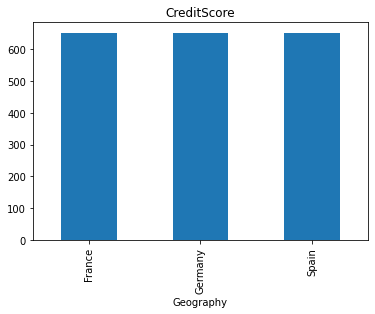

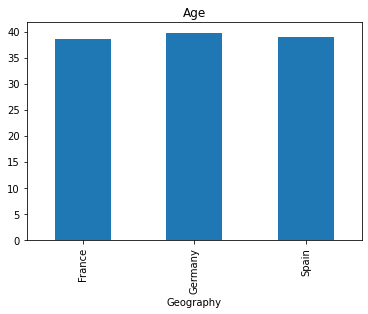

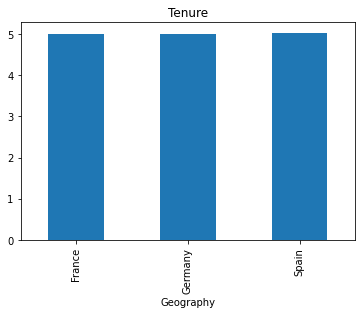

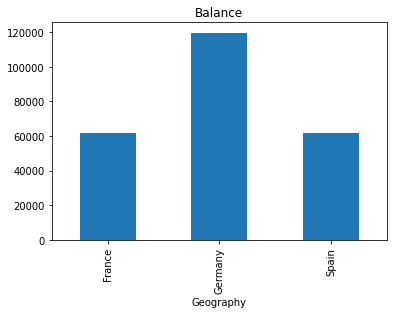

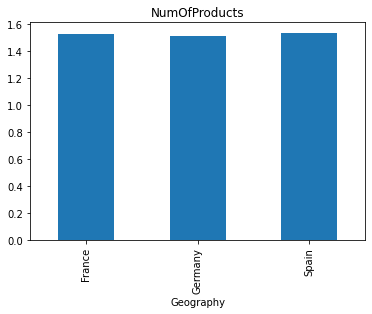

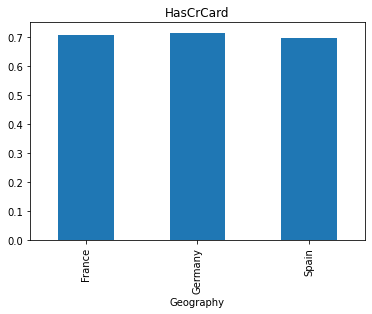

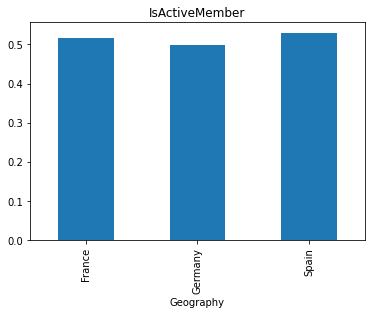

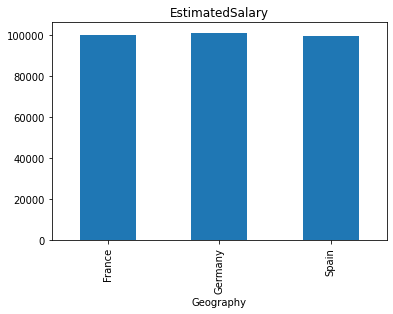

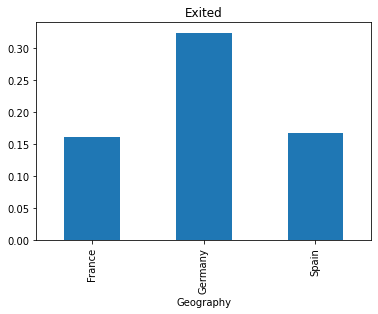

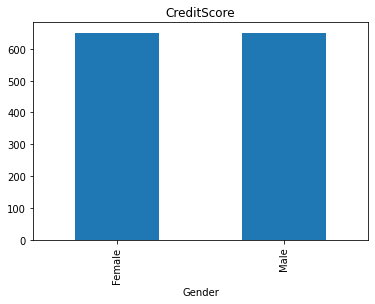

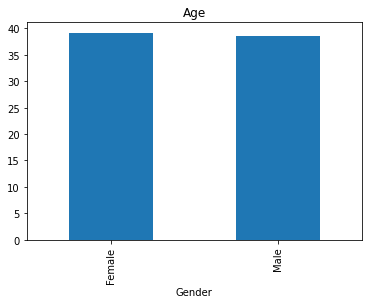

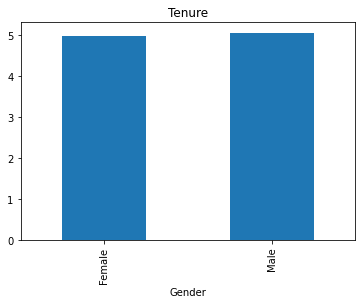

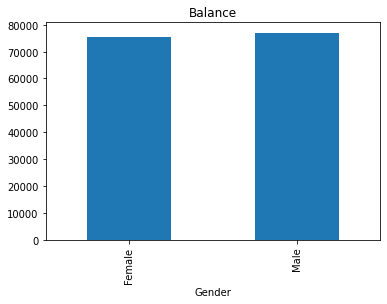

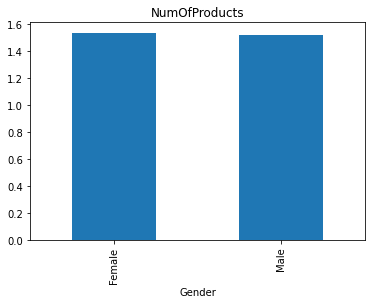

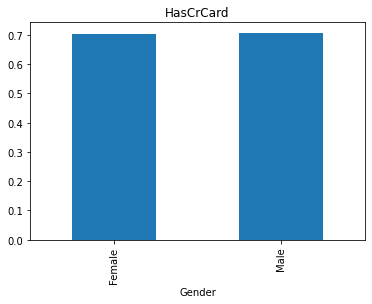

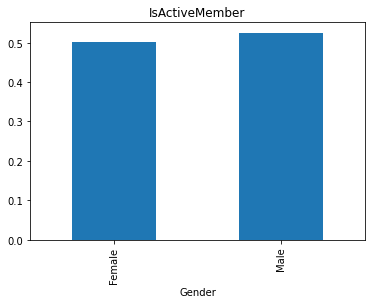

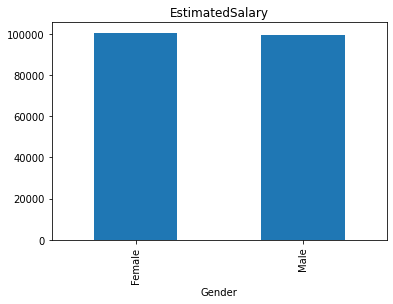

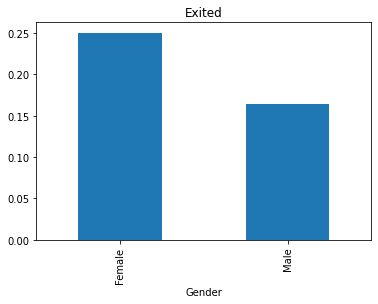

In [108]:
for cat_col in cat_cols:
    for num_col in num_cols:    
        df.groupby(cat_col)[num_col].mean().plot(kind='bar',title=num_col)
        plt.show()    


# Normal distribution test using qq-plot
https://www.investopedia.com/terms/t/t-test.asp
Explaining the T-Test
Essentially, a t-test allows us to compare the average values of the two data sets and determine if they came from the same population. In the above examples, if we were to take a sample of students from class A and another sample of students from class B, we would not expect them to have exactly the same mean and standard deviation. Similarly, samples taken from the placebo-fed control group and those taken from the drug prescribed group should have a slightly different mean and standard deviation.

Mathematically, the t-test takes a sample from each of the two sets and establishes the problem statement by assuming a null hypothesis that the two means are equal. Based on the applicable formulas, certain values are calculated and compared against the standard values, and the assumed null hypothesis is accepted or rejected accordingly.

If the null hypothesis qualifies to be rejected, it indicates that data readings are strong and are probably not due to chance.

The t-test is just one of many tests used for this purpose. Statisticians must additionally use tests other than the t-test to examine more variables and tests with larger sample sizes. For a large sample size, statisticians use a z-test. Other testing options include the chi-square test and the f-test.

There are three types of t-tests, and they are categorized as dependent and independent t-tests.

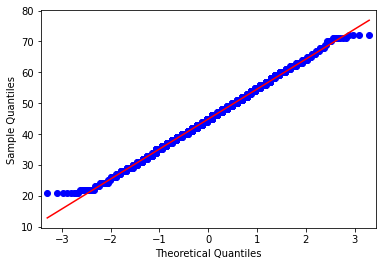

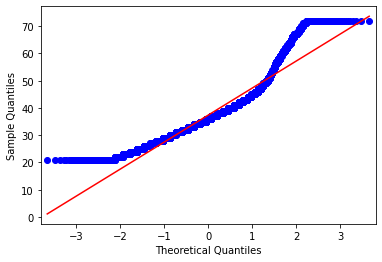

In [114]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
cat1 = df[df['Exited']==1]
cat2 = df[df['Exited']==0]
qqplot(cat1['Age'].dropna(),line='s')
qqplot(cat2['Age'].dropna(),line='s')
pyplot.show()

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

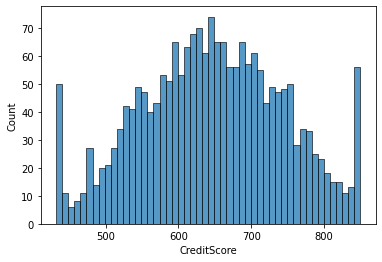

In [25]:
sns.histplot(cat1['CreditScore'],bins=50)

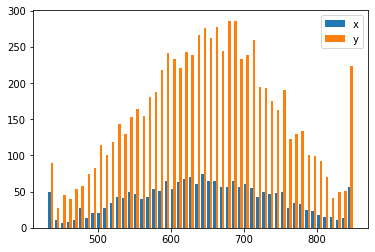

In [26]:
bins=50
plt.hist([cat1['CreditScore'], cat2['CreditScore']], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

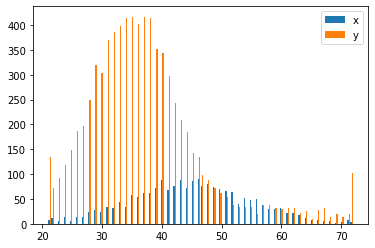

In [27]:
bins=100
plt.hist([cat1['Age'], cat2['Age']], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

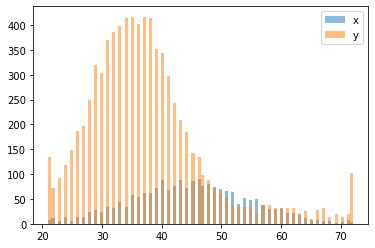

In [28]:
pyplot.hist(cat1['Age'], bins, alpha=0.5, label='x')
pyplot.hist(cat2['Age'], bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

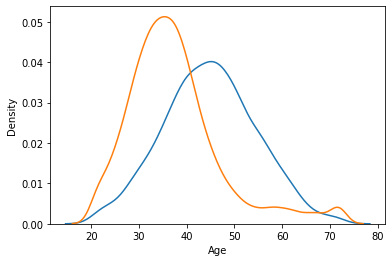

In [29]:
sns.kdeplot(cat1['Age'])
sns.kdeplot(cat2['Age'])

In [31]:
# help(ttest_ind)

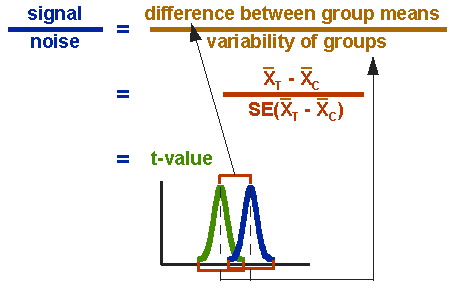

In [32]:
from scipy.stats import ttest_ind
# cat1 = df[df['Gender']=='Female']
# cat2 = df[df['Gender']=='Male']

cat1 = df[df['Exited']==1]
cat2 = df[df['Exited']==0]

for c in num_cols:
    print(c,ttest_ind(cat1[c].dropna(), cat2[c].dropna()))


CreditScore Ttest_indResult(statistic=-2.452131330314505, pvalue=0.014218257050422)
Age Ttest_indResult(statistic=30.43191203664587, pvalue=1.2969271791878348e-194)
Tenure Ttest_indResult(statistic=-1.4000584366735584, pvalue=0.16152684949473256)
Balance Ttest_indResult(statistic=11.839936836711265, pvalue=3.97558259153085e-32)
NumOfProducts Ttest_indResult(statistic=-7.090664564729202, pvalue=1.4250210213318842e-12)
HasCrCard Ttest_indResult(statistic=-0.7137233605912605, pvalue=0.47541491837605643)
IsActiveMember Ttest_indResult(statistic=-15.80508761104082, pvalue=1.348268516485762e-55)
EstimatedSalary Ttest_indResult(statistic=1.2130820044253456, pvalue=0.22512712912810567)
Exited Ttest_indResult(statistic=inf, pvalue=0.0)


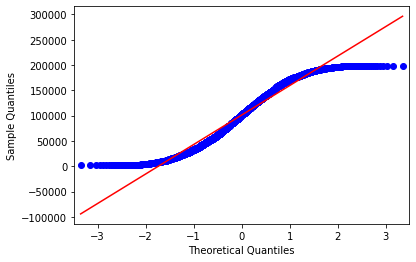

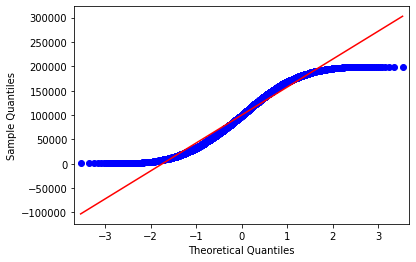

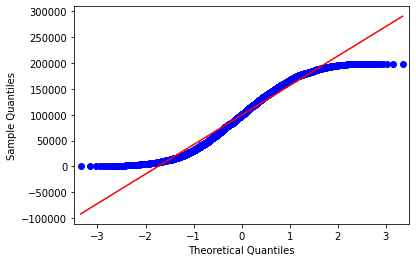

In [33]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
cat1 = df[df['Geography']=='Germany']
cat2 = df[df['Geography']=='France']
cat3 = df[df['Geography']=='Spain']

qqplot(cat1['EstimatedSalary'].dropna(),line='s')
qqplot(cat2['EstimatedSalary'].dropna(),line='s')
qqplot(cat3['EstimatedSalary'].dropna(),line='s')

pyplot.show()

In [34]:
from scipy import stats
cat1 = df[df['Geography']=='Germany']
cat2 = df[df['Geography']=='France']
cat3 = df[df['Geography']=='Spain']
for c in num_cols:   
    f_val, p_val = stats.f_oneway(cat1[c].dropna(), cat2[c].dropna(),cat3[c].dropna())            
    print (c,"--- One-way ANOVA P =", p_val )

CreditScore --- One-way ANOVA P = 0.6533695169382547
Age --- One-way ANOVA P = 3.1378182247466844e-06
Tenure --- One-way ANOVA P = 0.925249785691543
Balance --- One-way ANOVA P = 0.0
NumOfProducts --- One-way ANOVA P = 0.24873808742989695
HasCrCard --- One-way ANOVA P = 0.327120087819415
IsActiveMember --- One-way ANOVA P = 0.07049209306069416
EstimatedSalary --- One-way ANOVA P = 0.5574656196566496
Exited --- One-way ANOVA P = 3.9587330722442446e-67


<Figure size 432x288 with 0 Axes>

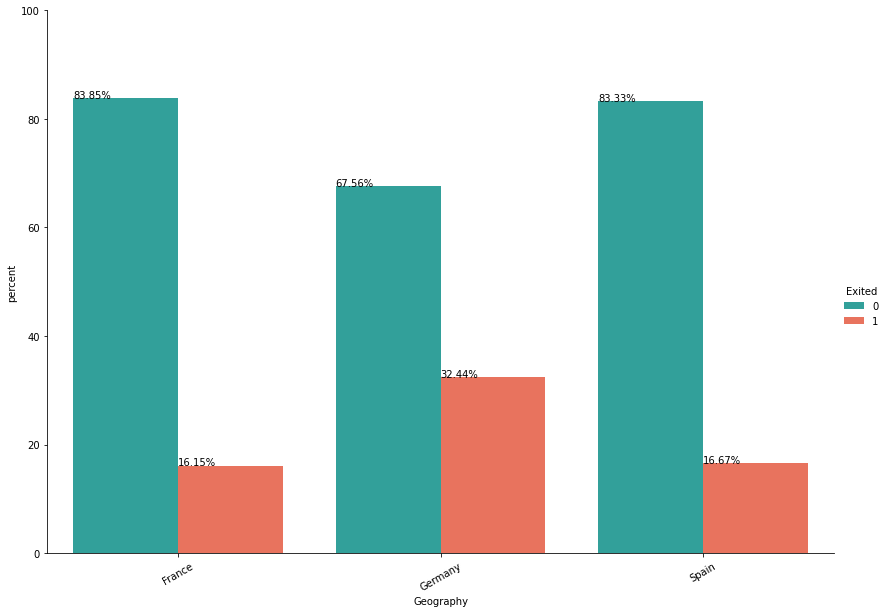

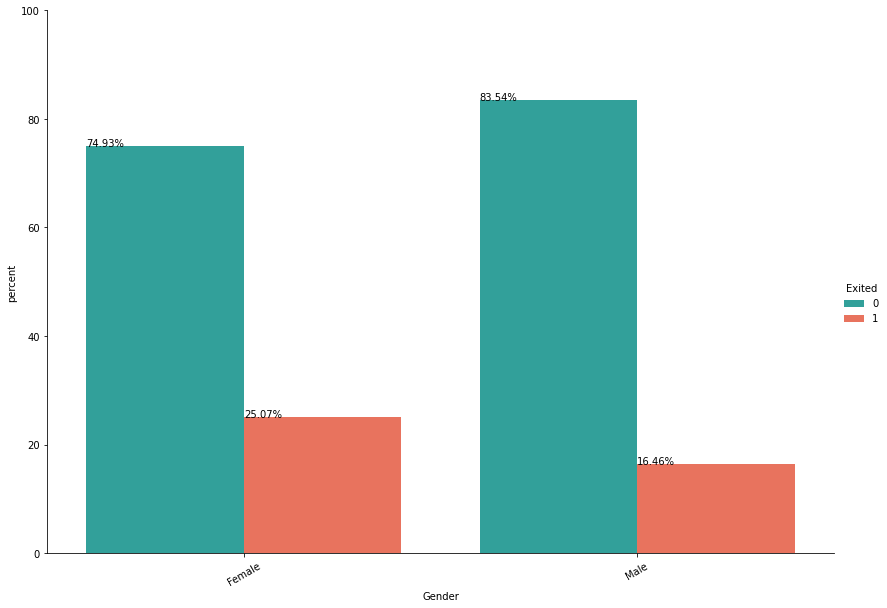

In [35]:
#Plot each attribute vs Class in percentage
y = 'Exited'
for i, predictor in enumerate(df[cat_cols]):
    plt.figure(i)
    df1 = df.groupby(predictor)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=predictor,y='percent',hue=y,kind='bar',data=df1,
                    palette=sns.color_palette(['lightseagreen', 'tomato']),height=8.27, aspect=11.7/8.27)
    g.set_xticklabels(rotation=30)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(np.nan_to_num(p.get_height().round(2))) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        txt_y=np.nan_to_num(txt_y)
        g.ax.text(txt_x,txt_y,txt)

# Logestic Regression/Modeling

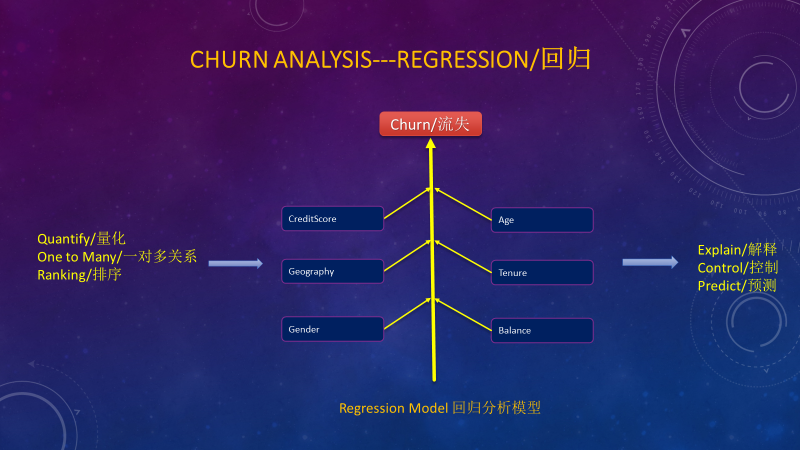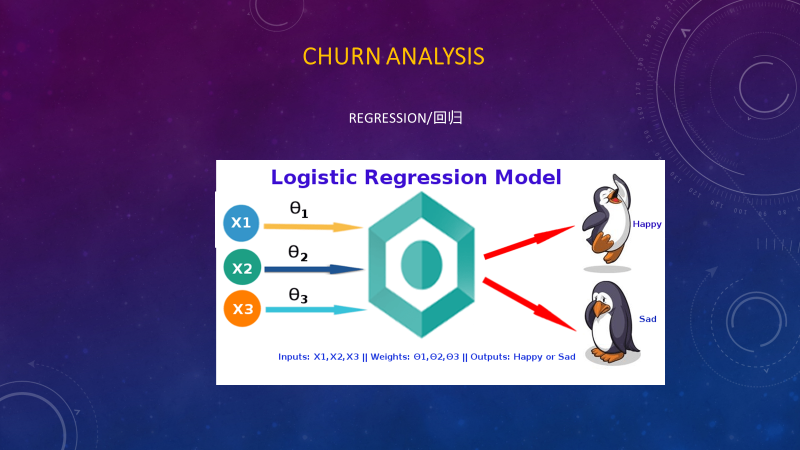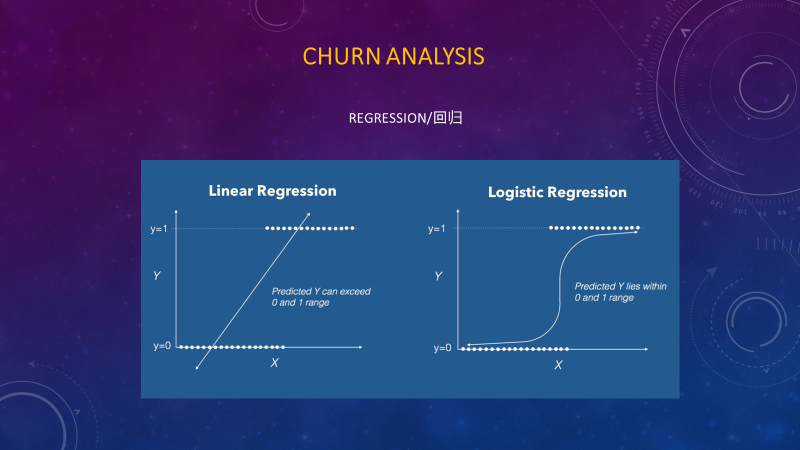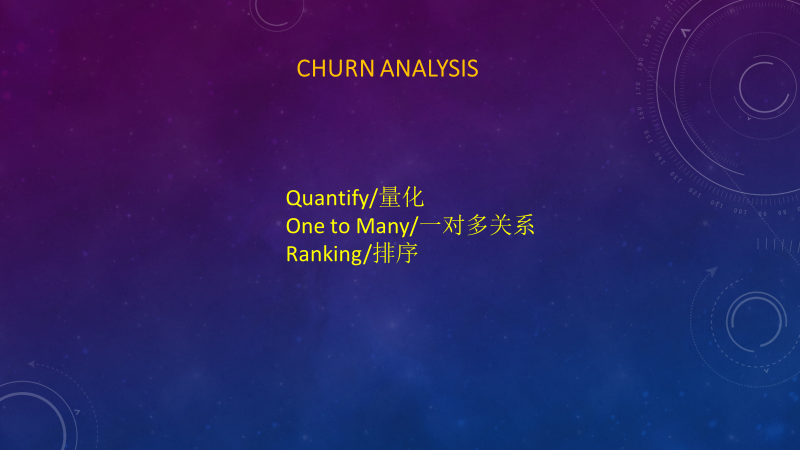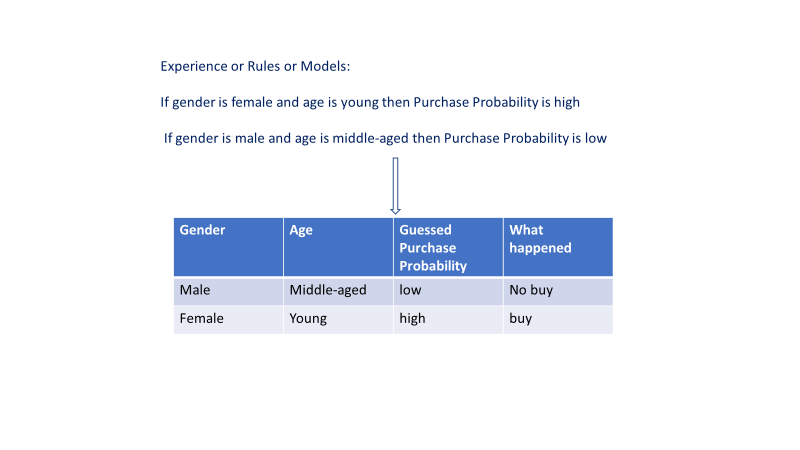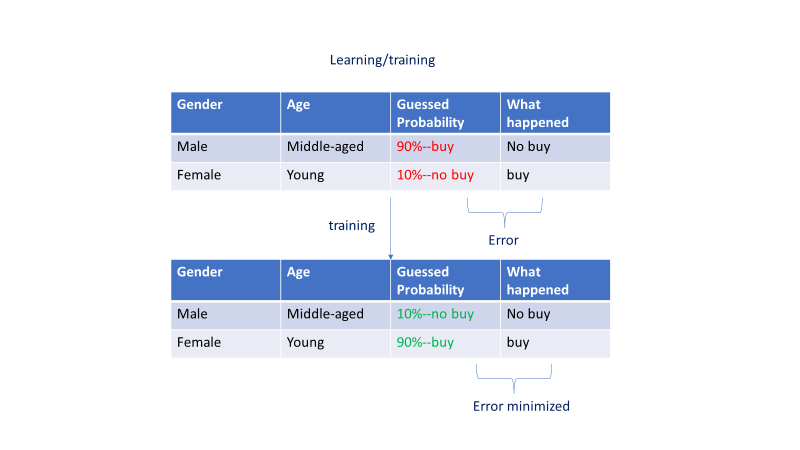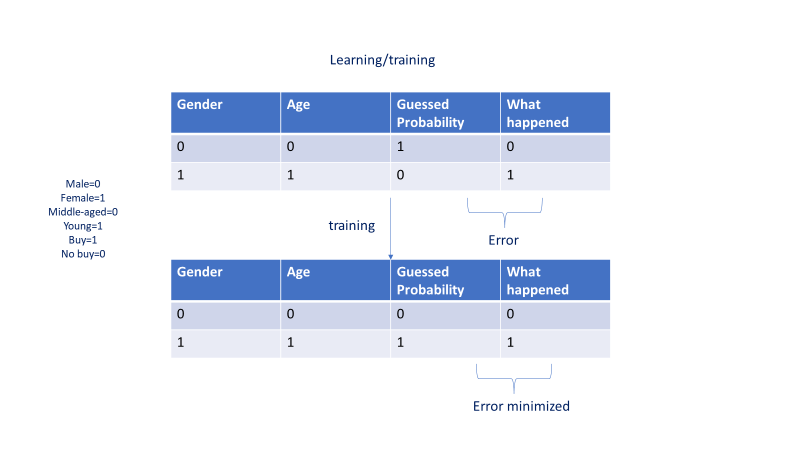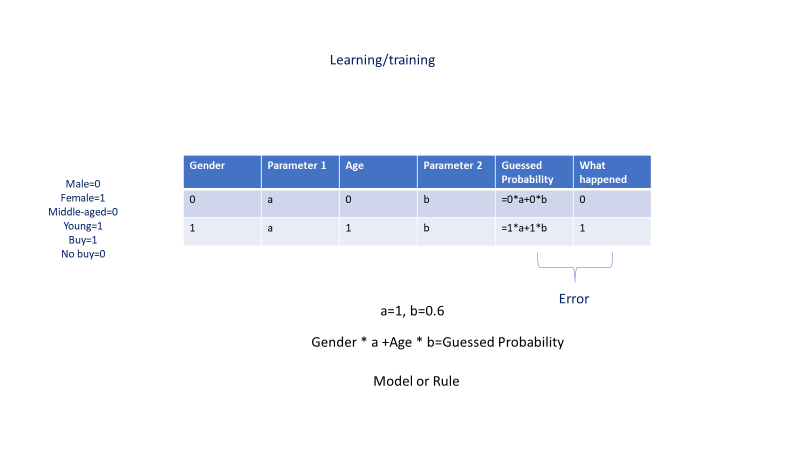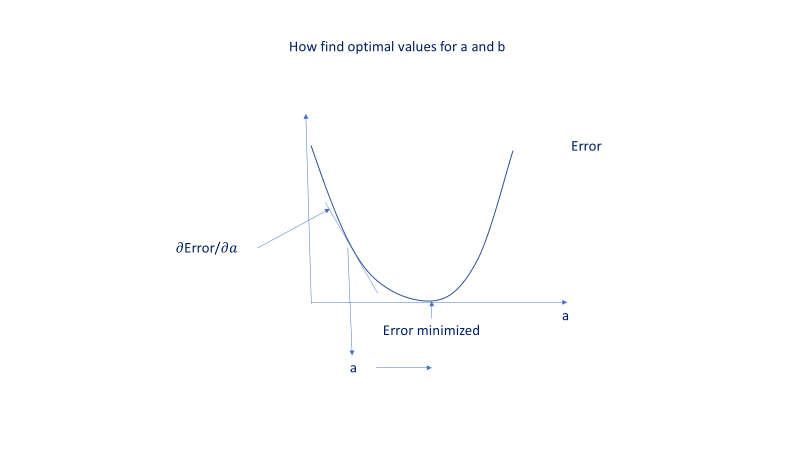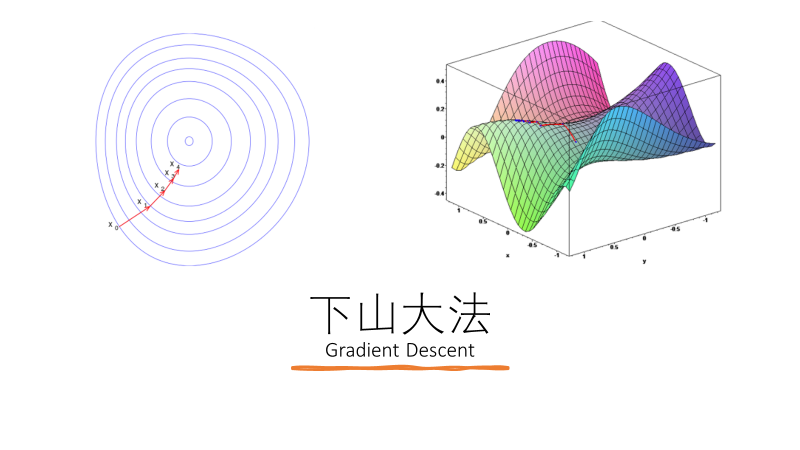

## Data processing and cleaning

In [115]:
df=pd.read_sql_table(r"marketing_churn",engine_datahub)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,7,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,0
1,21,15577657,McDonald,732,France,Male,41,8,0.0,2,1,1,170886.17,0
2,77,15614049,Hu,664,France,Male,55,8,0.0,2,1,1,139161.64,0
3,94,15640635,Capon,769,France,Male,29,8,0.0,2,1,1,172290.61,0
4,142,15724944,Tien,663,France,Male,34,7,0.0,2,1,1,180427.24,0


In [117]:

droplist='Surname'
cat_cols=df.select_dtypes(object).drop(droplist,axis=1).columns.tolist()

droplist=['RowNumber','CustomerId']
num_cols=df.select_dtypes('number').drop(droplist,axis=1).columns.tolist()


df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)

# df=df.query('`Attrition`.notnull()',engine='python')

In [119]:
#replace mnissing value with median, a better representation of the center of the data if it's not normally ditributed

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
for col in num_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))



In [120]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for col in cat_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))

In [40]:
# c='Purpose'
# percentage=5
# dct={}
# series = pd.value_counts(df[c])
# mask = (series/series.sum() * 100).lt(percentage)             
# dct[c] = series[mask].index.values.tolist()
# dct[c]
# df[c] = np.where(df[c].isin(dct[c]),'Other',df[c])
# df[c].value_counts()

In [122]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
5,Gender,2
10,HasCrCard,2
11,IsActiveMember,2
13,Exited,2
4,Geography,3
9,NumOfProducts,3
7,Tenure,11
6,Age,52
3,CreditScore,419
2,Surname,2931


In [123]:
df.query('`Exited`.notnull()',engine='python')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,7,15592531,Bartlett,822.0,France,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0.0
1,21,15577657,McDonald,732.0,France,Male,41.0,8.0,0.00,2.0,1.0,1.0,170886.17,0.0
2,77,15614049,Hu,664.0,France,Male,55.0,8.0,0.00,2.0,1.0,1.0,139161.64,0.0
3,94,15640635,Capon,769.0,France,Male,29.0,8.0,0.00,2.0,1.0,1.0,172290.61,0.0
4,142,15724944,Tien,663.0,France,Male,34.0,7.0,0.00,2.0,1.0,1.0,180427.24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9838,15809124,T'ien,750.0,France,Male,38.0,5.0,151532.40,1.0,1.0,1.0,46555.15,0.0
9996,9886,15574584,Fang,670.0,France,Male,33.0,8.0,126679.69,1.0,1.0,1.0,39451.09,0.0
9997,9910,15773338,Endrizzi,739.0,France,Male,58.0,2.0,101579.28,1.0,1.0,1.0,72168.53,0.0
9998,9968,15603794,Pugliesi,623.0,France,Male,48.0,5.0,118469.38,1.0,1.0,1.0,158590.25,0.0


In [124]:
#check for missing values
df[df.isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [126]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,7,15592531,Bartlett,822.0,France,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0.0
1,21,15577657,McDonald,732.0,France,Male,41.0,8.0,0.00,2.0,1.0,1.0,170886.17,0.0
2,77,15614049,Hu,664.0,France,Male,55.0,8.0,0.00,2.0,1.0,1.0,139161.64,0.0
3,94,15640635,Capon,769.0,France,Male,29.0,8.0,0.00,2.0,1.0,1.0,172290.61,0.0
4,142,15724944,Tien,663.0,France,Male,34.0,7.0,0.00,2.0,1.0,1.0,180427.24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9838,15809124,T'ien,750.0,France,Male,38.0,5.0,151532.40,1.0,1.0,1.0,46555.15,0.0
9996,9886,15574584,Fang,670.0,France,Male,33.0,8.0,126679.69,1.0,1.0,1.0,39451.09,0.0
9997,9910,15773338,Endrizzi,739.0,France,Male,58.0,2.0,101579.28,1.0,1.0,1.0,72168.53,0.0
9998,9968,15603794,Pugliesi,623.0,France,Male,48.0,5.0,118469.38,1.0,1.0,1.0,158590.25,0.0


In [127]:
#encode the attribute
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop([each], axis=1)
    return df


# cat_cols.remove('Attrition')
df=one_hot(df,cat_cols)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,7,15592531,Bartlett,822.0,50.0,7.0,0.0,2.0,1.0,1.0,10062.80,0.0,1,0,0,0,1
1,21,15577657,McDonald,732.0,41.0,8.0,0.0,2.0,1.0,1.0,170886.17,0.0,1,0,0,0,1
2,77,15614049,Hu,664.0,55.0,8.0,0.0,2.0,1.0,1.0,139161.64,0.0,1,0,0,0,1
3,94,15640635,Capon,769.0,29.0,8.0,0.0,2.0,1.0,1.0,172290.61,0.0,1,0,0,0,1
4,142,15724944,Tien,663.0,34.0,7.0,0.0,2.0,1.0,1.0,180427.24,0.0,1,0,0,0,1


In [128]:
item_list = df.columns.tolist()
item_list = [e for e in item_list if e not in ('Exited','Surname','RowNumber','CustomerId')]
item_list

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [132]:
#double check the data to see if there is any missing values and all categorical attributes have been encoded.
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,7,15592531,Bartlett,822.0,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0.0,1,0,0,0,1
1,21,15577657,McDonald,732.0,41.0,8.0,0.00,2.0,1.0,1.0,170886.17,0.0,1,0,0,0,1
2,77,15614049,Hu,664.0,55.0,8.0,0.00,2.0,1.0,1.0,139161.64,0.0,1,0,0,0,1
3,94,15640635,Capon,769.0,29.0,8.0,0.00,2.0,1.0,1.0,172290.61,0.0,1,0,0,0,1
4,142,15724944,Tien,663.0,34.0,7.0,0.00,2.0,1.0,1.0,180427.24,0.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9838,15809124,T'ien,750.0,38.0,5.0,151532.40,1.0,1.0,1.0,46555.15,0.0,1,0,0,0,1
9996,9886,15574584,Fang,670.0,33.0,8.0,126679.69,1.0,1.0,1.0,39451.09,0.0,1,0,0,0,1
9997,9910,15773338,Endrizzi,739.0,58.0,2.0,101579.28,1.0,1.0,1.0,72168.53,0.0,1,0,0,0,1
9998,9968,15603794,Pugliesi,623.0,48.0,5.0,118469.38,1.0,1.0,1.0,158590.25,0.0,1,0,0,0,1


# Compare different algorithms

In [131]:
df_x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.933014,0.568627,0.7,0.000000,0.5,1.0,1.0,0.041888,1.0,0.0,0.0,0.0,1.0
1,0.717703,0.392157,0.8,0.000000,0.5,1.0,1.0,0.861469,1.0,0.0,0.0,0.0,1.0
2,0.555024,0.666667,0.8,0.000000,0.5,1.0,1.0,0.699796,1.0,0.0,0.0,0.0,1.0
3,0.806220,0.156863,0.8,0.000000,0.5,1.0,1.0,0.868626,1.0,0.0,0.0,0.0,1.0
4,0.552632,0.254902,0.7,0.000000,0.5,1.0,1.0,0.910091,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.760766,0.333333,0.5,0.814836,0.0,1.0,1.0,0.227859,1.0,0.0,0.0,0.0,1.0
9996,0.569378,0.235294,0.8,0.681196,0.0,1.0,1.0,0.191655,1.0,0.0,0.0,0.0,1.0
9997,0.734450,0.725490,0.2,0.546223,0.0,1.0,1.0,0.358388,1.0,0.0,0.0,0.0,1.0
9998,0.456938,0.529412,0.5,0.637046,0.0,1.0,1.0,0.798807,1.0,0.0,0.0,0.0,1.0


In [135]:
y_test

3532    1.0
1528    0.0
5921    0.0
6813    1.0
2925    1.0
       ... 
367     0.0
7228    1.0
5446    0.0
6810    1.0
6542    0.0
Name: Exited, Length: 3000, dtype: float64

LR: 0.764008 (0.016620)
LDA: 0.766638 (0.017181)
KNN: 0.752018 (0.021867)
CART: 0.677706 (0.019468)
NB: 0.776426 (0.013487)


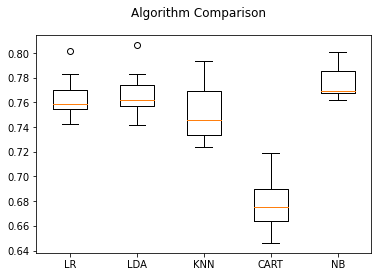

In [130]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_x =pd.DataFrame(scaler.fit_transform(df[item_list]),columns=item_list)
                   
# df['Attrition encoded']=np.where(df['Attrition']=='No',0,1)   

#splitting the principal training dataset to subtrain and subtest datasets

x_train, x_test, y_train, y_test = train_test_split(df_x, df['Exited'], 
                                                    test_size = .3)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_x =pd.DataFrame(scaler.fit_transform(df[item_list]),columns=item_list)
                   
# df['Loan Status encoded']=np.where(df['Loan Status']=='Fully Paid',0,1)                   
                   
# load dataset
# x_train, x_test, y_train, y_test = train_test_split(df_x, df['Loan Status encoded'], 
#                                                     test_size = .25)

X = x_train
Y = y_train

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Create the function to train the model, test it, and visualize the results

In [139]:
predictions

NameError: name 'predictions' is not defined

In [137]:
def prediction(algorithm, training_x, testing_x, training_y, testing_y, cf, threshold_plot):
    #model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["0", "1"],
                        y = ["0", "1"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "Roc: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                        dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        display(coef_sumry)
        #plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                     )
                       )
        #subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion matrix',
                                                'Receiver operating characteristic',
                                                'Feature importances')
                           )  
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig.append_trace(trace4,2,1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        

        
    py.iplot(fig)
    return(coef_sumry,algorithm)



## Feed the parameters to the function created above
Split the data into train dataset and test dataset and use the Hyper Parameters obtained above to generate a Logistic Regression instance and execute the function.

In [49]:
help(LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import statsmodels.api as sm
# from yellowbrick.classifier import DiscriminationThreshold

#For better performance use MinMaxScaler to scale and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x =pd.DataFrame(scaler.fit_transform(df[item_list]),columns=item_list)
                   
# df['Attrition encoded']=np.where(df['Attrition']=='No',0,1)   

#splitting the principal training dataset to subtrain and subtest datasets

x_train, x_test, y_train, y_test = train_test_split(df_x, df['Exited'], 
                                                    test_size = .3)
from sklearn.linear_model import LogisticRegression
import plotly.graph_objs as go # visualization
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
#Baseline model        
# logit = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
#                            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#                            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#                            verbose=0, warm_start=False)
logit = LogisticRegression()

coef_sumry, model=prediction(logit, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=False)

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

         0.0       0.82      0.96      0.89      2373
         1.0       0.60      0.21      0.31       627

    accuracy                           0.81      3000
   macro avg       0.71      0.59      0.60      3000
weighted avg       0.78      0.81      0.77      3000

Accuracy Score: 0.8056666666666666
Area under curve: 0.587894716679067 



,coefficients,features
1,3.731722,Age
9,0.552905,Geography_Germany
3,0.476349,Balance
11,0.267881,Gender_Female
7,0.039891,EstimatedSalary
5,-0.127193,HasCrCard
0,-0.211215,CreditScore
2,-0.254921,Tenure
8,-0.268007,Geography_France
12,-0.268263,Gender_Male


### Interpret the results:
<!-- An Accuracy Score of 0.96 on Test data is a very good score with 1 being perfect 100% correct prediction. 
From the confusion Matrix we know that out of 194 predictions, only 7 mistake. Area under curve(True Positive/ False Positive), 
another model performance metric which often is used for unbalanced samples, is 0.965, also near perfect. 
The Feature Importance chart  suggests that  Money_Values, PARA_B, PARA_A, Score and District_Loss are more powerful predictors for Risk. 
 -->
<!-- Overall we have a very good model that can predict Risk. -->

# Productization of your Insights/Recommendations

In [140]:
df=pd.read_sql_table(r"marketing_churn",engine_datahub)
df.head()


# limitPer = len(df) * .80
# df = df.dropna(thresh=limitPer, axis=1)

# limitPer=df.shape[1] * .50
# df = df.dropna(thresh=limitPer, axis=0)
                  


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,7,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,0
1,21,15577657,McDonald,732,France,Male,41,8,0.0,2,1,1,170886.17,0
2,77,15614049,Hu,664,France,Male,55,8,0.0,2,1,1,139161.64,0
3,94,15640635,Capon,769,France,Male,29,8,0.0,2,1,1,172290.61,0
4,142,15724944,Tien,663,France,Male,34,7,0.0,2,1,1,180427.24,0


In [141]:
df['probabily'] = model.predict_proba(df_x)[:,1]
df.sort_values(by='probabily',ascending=False).head(50)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,probabily
7538,9556,15655360,Chikelu,782,Germany,Female,72,5,148666.99,1,1,0,2605.65,1,0.913288
7613,4816,15737647,Obioma,775,Germany,Female,77,6,135120.56,1,1,0,37836.64,0,0.909288
7475,7500,15790113,Schofield,609,Germany,Female,71,6,113317.10,1,1,0,108258.22,1,0.906713
6903,7630,15591107,Flemming,723,Germany,Female,68,3,110357.00,1,0,0,141977.54,1,0.900247
7672,9588,15653050,Norriss,719,Germany,Female,76,10,95052.29,1,1,0,176244.87,0,0.896302
7396,4436,15648967,Ch'en,698,Germany,Female,64,1,169362.43,1,1,0,84760.32,1,0.879024
4858,8489,15794360,Hao,592,Germany,Female,70,5,71816.74,2,1,0,105096.82,1,0.877843
3828,9748,15775761,Iweobiegbunam,610,Germany,Female,69,5,86038.21,3,0,0,192743.06,1,0.871623
7461,7009,15638610,Kennedy,635,Germany,Female,65,5,117325.54,1,1,0,155799.86,1,0.866158
3778,4464,15778975,Nnonso,850,Germany,Female,70,1,96947.58,3,1,0,62282.99,1,0.863360


In [54]:
import pyodbc
import urllib
import sqlalchemy

'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))
# df=df.drop('Purpose_other',axis=1)
df.to_sql('Marketing_prediction',engine_datahub,if_exists='replace',index=False)